In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


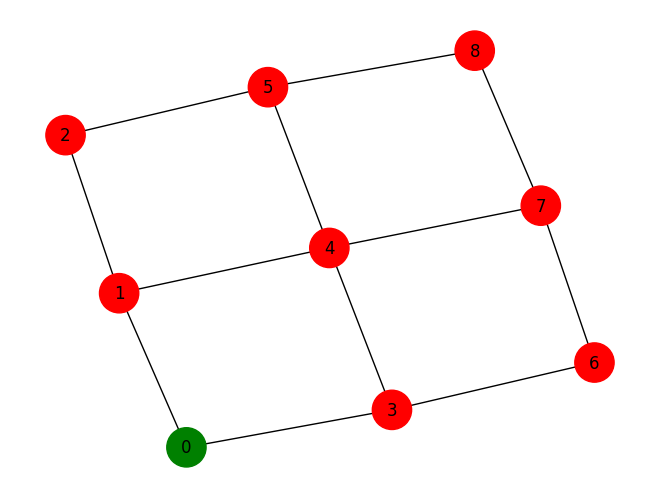

In [2]:
rede = Network()
controller = Controller(rede)
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com 8 clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

In [3]:
# Geração de uma requisição para teste
alice_id = random.randint(1, 8)
bob_id = 0
num_qubits = 5
num_gates = 30

request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates)
rede.execute_request(request)


     ┌───┐                                     ┌───┐                        »
q_0: ┤ X ├─■─────────────────────────────────X─┤ Y ├──────────────X─────────»
     └─┬─┘ │              ┌───┐┌───┐         │ └───┘        ┌───┐ │ ┌───┐   »
q_1: ──┼───┼────────────■─┤ Y ├┤ H ├─■───X───┼────────────X─┤ H ├─┼─┤ T ├─X─»
       │   │ ┌───┐      │ └───┘└───┘ │   │   │ ┌───┐┌───┐ │ └───┘ │ └───┘ │ »
q_2: ──■───┼─┤ H ├──────┼────────────┼───X───┼─┤ X ├┤ Z ├─┼───────┼───────┼─»
           │ └───┘      │            │       │ └─┬─┘├───┤ │       │ ┌───┐ │ »
q_3: ──────■───■────────┼────────────┼───────┼───■──┤ Y ├─┼───────X─┤ T ├─┼─»
     ┌───┐     │  ┌───┐ │            │ ┌───┐ │      └───┘ │ ┌───┐   └───┘ │ »
q_4: ┤ S ├─────■──┤ T ├─■────────────■─┤ T ├─X────────────X─┤ H ├─────────X─»
     └───┘        └───┘                └───┘                └───┘           »
«                              
«q_0: ─────────────────────────
«          ┌───┐               
«q_1: ─────┤ X ├───────────────
«          └─┬

C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
2024-11-18 11:34:19,056: Circuito aleatório gerado com 5 qubits e 30 portas.
2024-11-18 11:34:19,059: Instrução: {'operation': 'cx', 'qubits': [2, 0]}
2024-11-18 11:34:19,060: Instrução: {'operation': 's', 'qubits': [4]}
2024-11-18 11:34:19,060: Instrução: {'operation': 'cz', 'qubits': [0, 3]}
2024-11-18 11:34:19,061: Instrução: {'operation': 'cz', 'qubits': [4, 3]}
2024-11-18 11:34:19,061: Instrução: {'operation': 't', 'qubits': [4]}
2024-11-18 11:34:19,062: Instrução: {'operation': 'cz', 'qubits': [4, 1]}
2024-11-18 11:34:19,062: Instrução: {'operation': 'h', 'qubits': [2]}
2024-11-18 11:34:19,063: Instr

In [4]:
# Gera e envia requisições para o controlador
for _ in range(2):  # Número de requisições
    alice_id = random.randint(1, 8)  
    bob_id = 0  
    num_qubits = random.randint(3, 6)  
    num_gates = random.randint(20, 30)  

    # Gera uma requisição e a envia ao controlador
    request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates)
    controller.receive_request(request)

# Agenda as requisições recebidas no controlador
controller.schedule_requests(controller.pending_requests)

# Executa as requisições agendadas na rede
controller.send_scheduled_requests()

# Relatório (opcional): Verifica se as requisições foram executadas corretamente
controller.generate_schedule_report()


2024-11-18 11:34:19,331: Circuito aleatório gerado com 6 qubits e 29 portas.
2024-11-18 11:34:19,331: Instrução: {'operation': 'x', 'qubits': [1]}
2024-11-18 11:34:19,331: Instrução: {'operation': 'x', 'qubits': [3]}
2024-11-18 11:34:19,331: Instrução: {'operation': 's', 'qubits': [0]}
2024-11-18 11:34:19,331: Instrução: {'operation': 'x', 'qubits': [5]}
2024-11-18 11:34:19,335: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2024-11-18 11:34:19,335: Instrução: {'operation': 'cz', 'qubits': [5, 3]}
2024-11-18 11:34:19,335: Instrução: {'operation': 's', 'qubits': [2]}
2024-11-18 11:34:19,335: Instrução: {'operation': 'h', 'qubits': [3]}
2024-11-18 11:34:19,335: Instrução: {'operation': 'z', 'qubits': [5]}
2024-11-18 11:34:19,335: Instrução: {'operation': 'swap', 'qubits': [1, 5]}
2024-11-18 11:34:19,335: Instrução: {'operation': 't', 'qubits': [0]}
2024-11-18 11:34:19,335: Instrução: {'operation': 'z', 'qubits': [3]}
2024-11-18 11:34:19,335: Instrução: {'operation': 'h', 'qubits': [3]}

     ┌───┐┌───┐                       ┌───┐┌───┐                   
q_0: ┤ S ├┤ T ├────────────────────■──┤ X ├┤ Z ├─■───X────────■────
     ├───┤└───┘                    │  └─┬─┘└───┘ │   │  ┌───┐ │    
q_1: ┤ X ├──■────────X────────■────┼────■────────┼───X──┤ X ├─┼──■─
     └───┘┌─┴─┐┌───┐ │ ┌───┐  │    │             │ ┌───┐└───┘ │  │ 
q_2: ─────┤ X ├┤ S ├─┼─┤ H ├──■────┼─────────────■─┤ S ├──────┼──■─
     ┌───┐└───┘├───┤ │ ├───┤┌───┐  │               └───┘      │    
q_3: ┤ X ├──■──┤ H ├─┼─┤ Z ├┤ H ├──■──────────────────────────┼────
     └───┘  │  └───┘ │ └───┘├───┤          ┌───┐              │    
q_4: ───────┼────────┼──────┤ X ├───────X──┤ Z ├──────────────┼────
     ┌───┐  │  ┌───┐ │ ┌───┐└─┬─┘┌───┐  │  └───┘              │    
q_5: ┤ X ├──■──┤ Z ├─X─┤ H ├──■──┤ S ├──X─────────────────────■────
     └───┘     └───┘   └───┘     └───┘                             
                                    ┌───┐┌───┐                             »
q_0: ──────X──■────────X────────────┤ X

2024-11-18 11:34:19,463: Circuito aleatório gerado com 5 qubits e 29 portas.
2024-11-18 11:34:19,466: Instrução: {'operation': 's', 'qubits': [1]}
2024-11-18 11:34:19,466: Instrução: {'operation': 's', 'qubits': [3]}
2024-11-18 11:34:19,482: Instrução: {'operation': 'swap', 'qubits': [0, 4]}
2024-11-18 11:34:19,501: Instrução: {'operation': 'cz', 'qubits': [4, 0]}
2024-11-18 11:34:19,504: Instrução: {'operation': 't', 'qubits': [3]}
2024-11-18 11:34:19,505: Instrução: {'operation': 'h', 'qubits': [4]}
2024-11-18 11:34:19,507: Instrução: {'operation': 'swap', 'qubits': [3, 0]}
2024-11-18 11:34:19,508: Instrução: {'operation': 'swap', 'qubits': [3, 2]}
2024-11-18 11:34:19,508: Instrução: {'operation': 'z', 'qubits': [4]}
2024-11-18 11:34:19,510: Instrução: {'operation': 'z', 'qubits': [2]}
2024-11-18 11:34:19,512: Instrução: {'operation': 'cx', 'qubits': [3, 0]}
2024-11-18 11:34:19,512: Instrução: {'operation': 's', 'qubits': [4]}
2024-11-18 11:34:19,512: Instrução: {'operation': 'cx', '

Relatório de Agendamento:
Timeslot 0: 2 requisições alocadas.
  - Alice 3 -> Bob 0 | Protocolo: AC_BQC
  - Alice 1 -> Bob 0 | Protocolo: AC_BQC
